In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
from launch_cython_cyril_telegraph import generate_gray_areas

In [63]:
df = pd.concat([pd.read_csv("plot_pf00004/results.csv"), pd.read_csv("plot_pf00004-2/results.csv"), pd.read_csv("plot_pf00004-3/results.csv"), pd.read_csv("plot_pf00004-4/results.csv")])
# Group by (T_low, T_high) and plot ppv vs T_step
unique_pairs = df[['T_low', 'T_high', 'tau']].drop_duplicates()
# Filter out T_step = 4000 and sort by T_step
df_filtered = df[df['T_step'] != 4000].sort_values(by=['tau', 'T_low', 'T_high', 'T_step'])
df_filtered['T_step'] = df_filtered['T_step'].apply(lambda x: int(x))

switch_times = np.load("plot_pf00004-3/switch_times_tau300.npy")
gray_areas, _, _ = generate_gray_areas(switch_times, end_time=4000)


In [64]:
df_filtered.to_csv("all_results.csv", index=False)

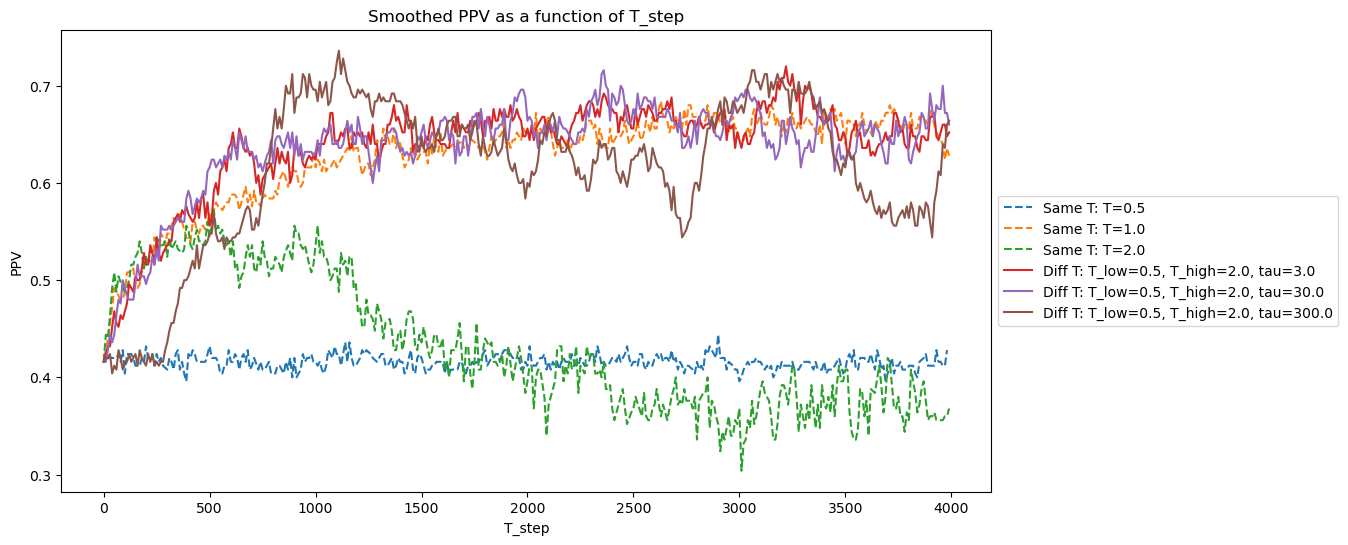

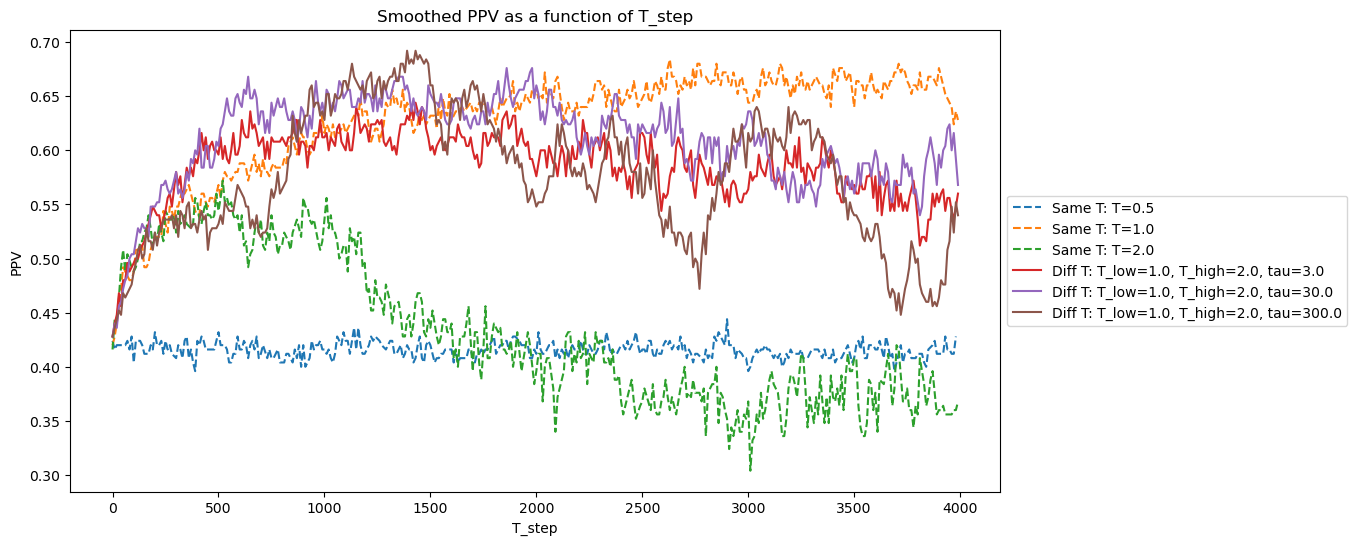

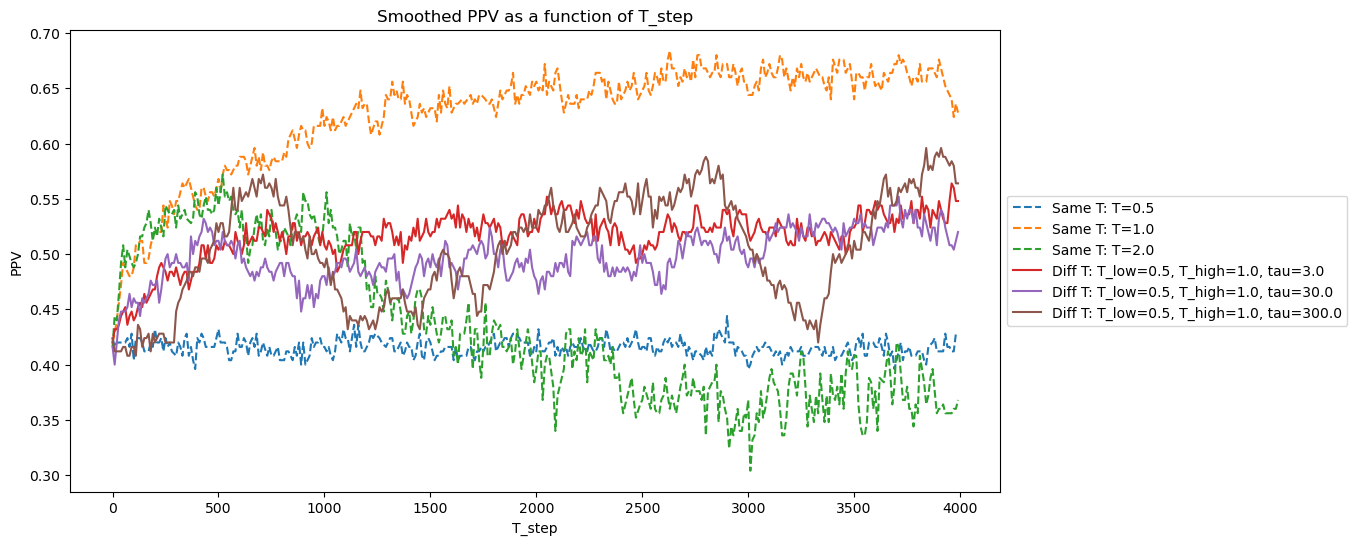

In [77]:
# Separate cases where T_low == T_high and T_low != T_high
same_t = df_filtered[df_filtered["T_low"] == df_filtered["T_high"]]
diff_t = df_filtered[df_filtered["T_low"] != df_filtered["T_high"]]


# Add vertical lines for switch times and gray areas
"""for switch_time in switch_times:
    plt.axvline(x=switch_time, color='gray', linestyle='--', linewidth=0.5)
for start, end in gray_areas:
    plt.axvspan(start, end, color='gray', alpha=0.2)"""

Ts = [(0.5, 2.0), (1.0, 2.0), (0.5, 1.0)]
for T_low, T_high in Ts:
    plt.figure(figsize=(12, 6))

    # Plot for T_low == T_high
    for _, row in same_t[['T_low', 'T_high']].drop_duplicates().iterrows():
        subset = same_t[(same_t['T_low'] == row['T_low']) & (same_t['T_high'] == row['T_high'])]
        subset = subset.sort_values(by="T_step")

        if len(subset) > 3:
            y_smooth = gaussian_filter1d(subset["ppv"], sigma=0.01)
            plt.plot(subset["T_step"], y_smooth, linestyle='--', label=f"Same T: T={row['T_low']}")
        else:
            plt.plot(subset["T_step"], subset["ppv"], linestyle='--', label=f"Same T: T={row['T_low']}")

    # Plot for T_low != T_high
    for _, row in diff_t[['T_low', 'T_high', 'tau']].drop_duplicates().iterrows():
        if row['T_low'] != T_low or row['T_high'] != T_high:
            continue
        subset = diff_t[(diff_t['T_low'] == row['T_low']) & (diff_t['T_high'] == row['T_high']) & (diff_t['tau'] == row['tau'])]
        subset = subset.sort_values(by="T_step")

        if len(subset) > 3:
            y_smooth = gaussian_filter1d(subset["ppv"], sigma=0.01)
            plt.plot(subset["T_step"], y_smooth, linestyle='-', label=f"Diff T: T_low={row['T_low']}, T_high={row['T_high']}, tau={row['tau']}")
        else:
            plt.plot(subset["T_step"], subset["ppv"], linestyle='-', label=f"Diff T: T_low={row['T_low']}, T_high={row['T_high']}, tau={row['tau']}")

    # Customize plot
    plt.xlabel("T_step")
    plt.ylabel("PPV")
    plt.title("Smoothed PPV as a function of T_step")
    plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
    plt.show()

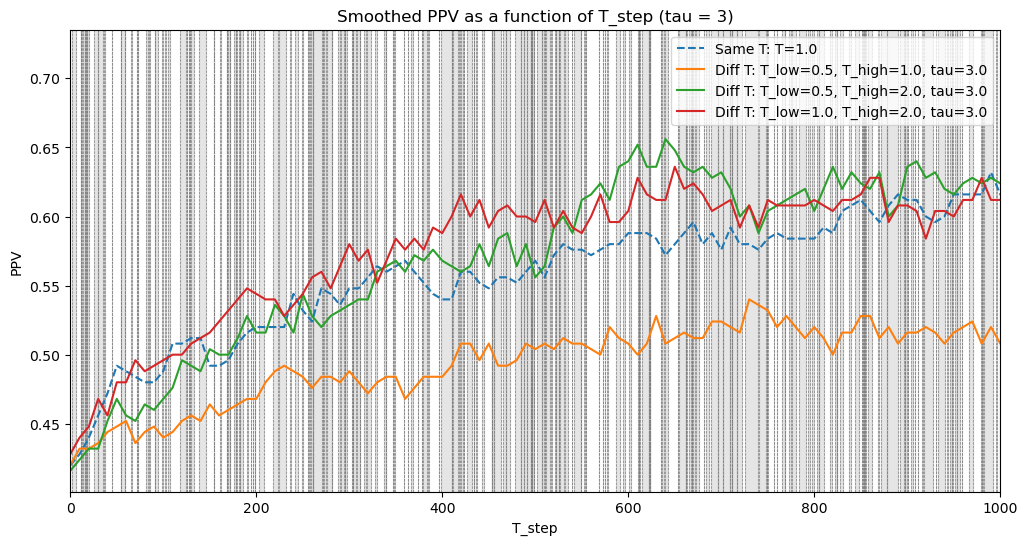

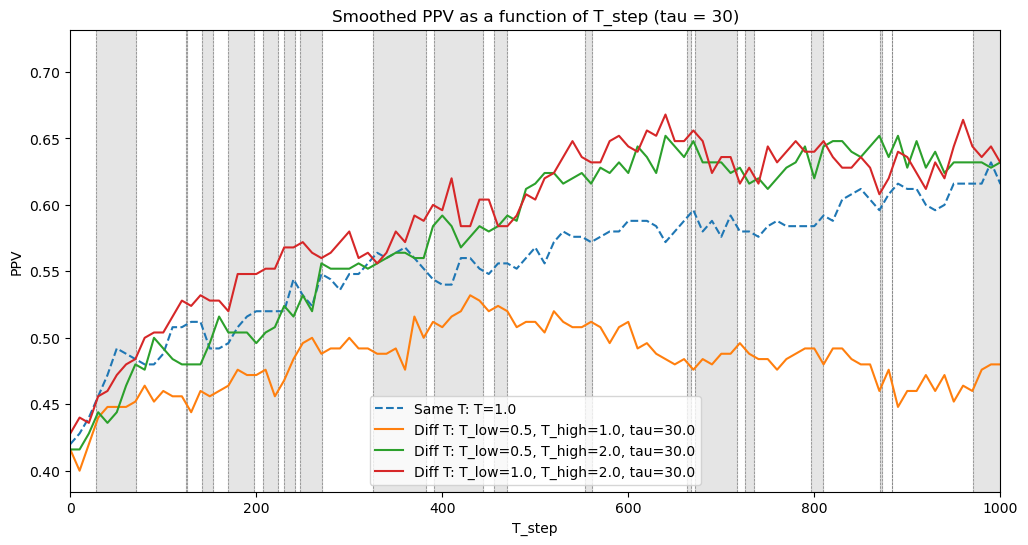

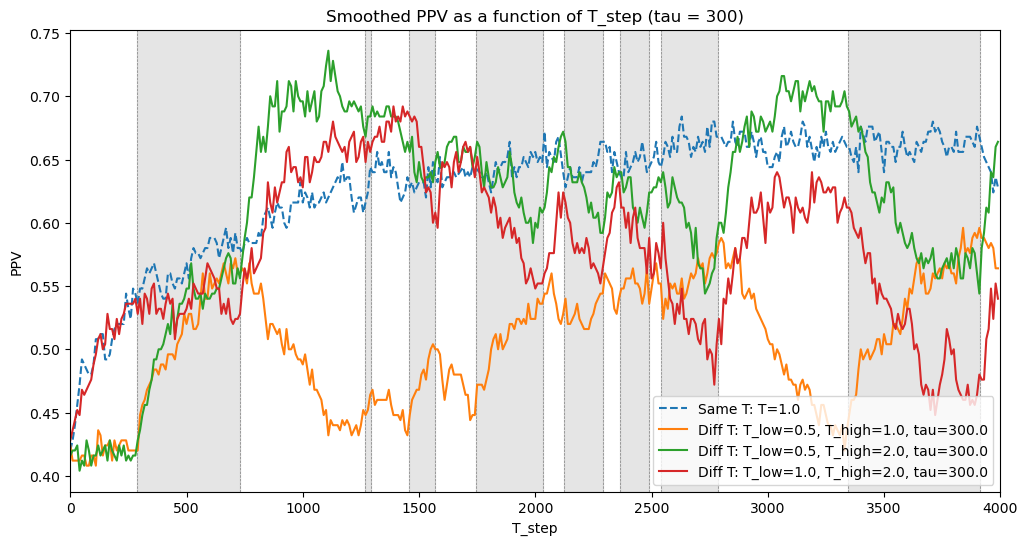

In [75]:
for tau in [3,30,300]:
    plt.figure(figsize=(12, 6))
    subset = same_t[(same_t['T_low'] == 1) & (same_t['T_high'] == 1)]
    subset = subset.sort_values(by="T_step")
    switch_times = np.load(f"switch_times_tau{tau}.npy")
    gray_areas, _, _ = generate_gray_areas(switch_times, end_time=4000)
    for switch_time in switch_times:
        plt.axvline(x=switch_time, color='gray', linestyle='--', linewidth=0.5)
    for start, end in gray_areas:
        plt.axvspan(start, end, color='gray', alpha=0.2)
    if len(subset) > 3:
        y_smooth = gaussian_filter1d(subset["ppv"], sigma=0.01)
        plt.plot(subset["T_step"], y_smooth, linestyle='--', label=f"Same T: T={row['T_low']}")
    else:
        plt.plot(subset["T_step"], subset["ppv"], linestyle='--', label=f"Same T: T={row['T_low']}")

    # Plot for T_low != T_high
    for _, row in diff_t[['T_low', 'T_high', 'tau']].drop_duplicates().iterrows():
        if row['tau'] != tau:
            continue
        subset = diff_t[(diff_t['T_low'] == row['T_low']) & (diff_t['T_high'] == row['T_high']) & (diff_t['tau'] == row['tau'])]
        subset = subset.sort_values(by="T_step")

        if len(subset) > 3:
            y_smooth = gaussian_filter1d(subset["ppv"], sigma=0.01)
            plt.plot(subset["T_step"], y_smooth, linestyle='-', label=f"Diff T: T_low={row['T_low']}, T_high={row['T_high']}, tau={row['tau']}")
        else:
            plt.plot(subset["T_step"], subset["ppv"], linestyle='-', label=f"Diff T: T_low={row['T_low']}, T_high={row['T_high']}, tau={row['tau']}")
    # Customize plot
    plt.xlabel("T_step")
    plt.ylabel("PPV")
    plt.title(f"Smoothed PPV as a function of T_step (tau = {tau})")
    plt.legend()
    if tau < 100:
        plt.xlim(0,1000)
    else:
        plt.xlim(0,4000)

    plt.show()
